Python MiniProject


P1

Covariance and correlation measure the relationship between two variables. **Covariance** quantifies how two variables change together and is given by:  

Cov(X, Y) = Σ[(X_i - X̄)(Y_i - Ȳ)] / n


**Correlation** standardizes covariance to a scale of \(-1\) to \(1\), representing the strength and direction of the linear relationship, defined as:

Corr(X, Y) = Cov(X, Y) / (σ_X * σ_Y)


where \(\sigma_X\) and \(\sigma_Y\) are the standard deviations of \(X\) and \(Y\).

In [4]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
iris_df = sns.load_dataset("iris")
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


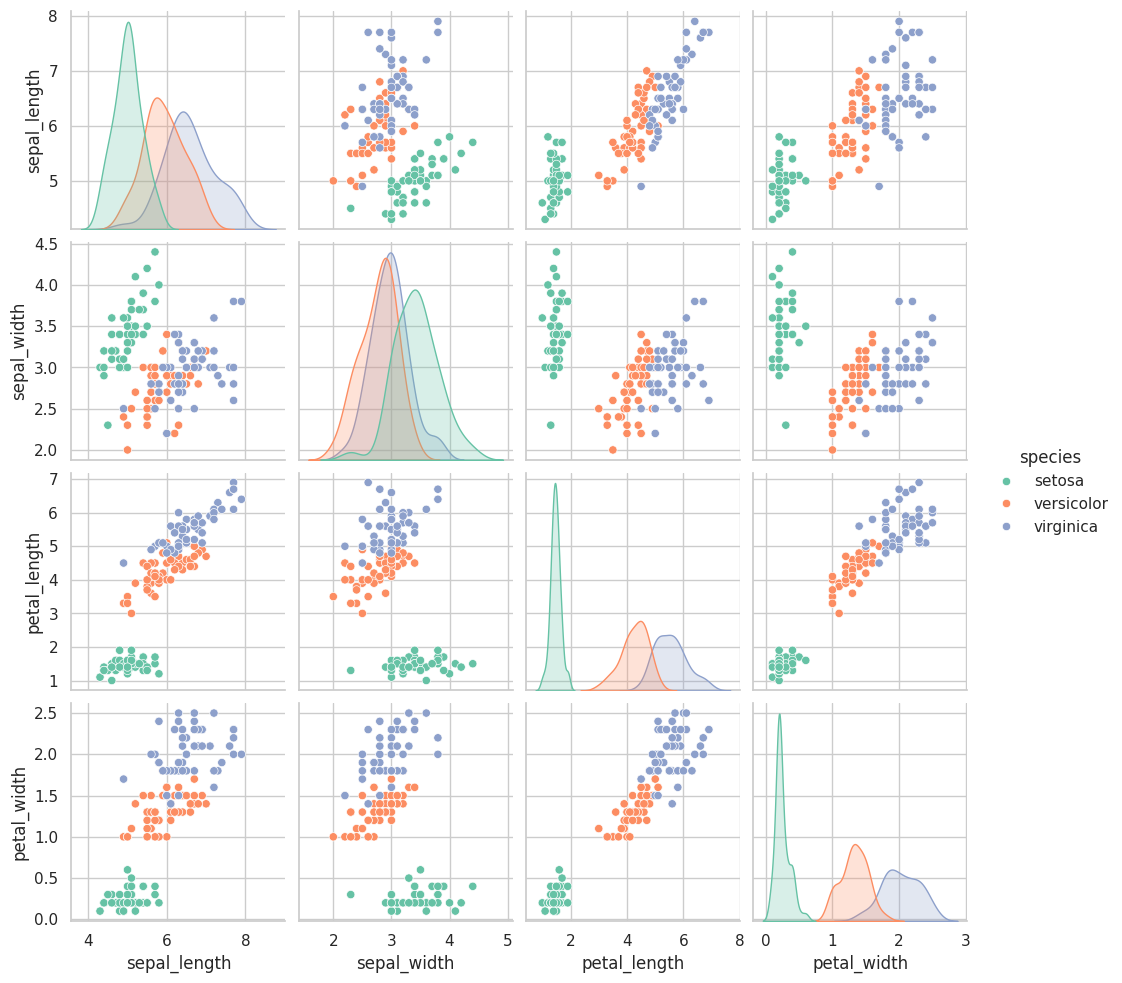

In [ ]:
sns.set(style="whitegrid")
pairplot = sns.pairplot(iris_df, hue="species", diag_kind="kde", palette="Set2")
plt.show()

fig = px.scatter_matrix(
    iris_df,
    dimensions=["sepal_length", "sepal_width", "petal_length", "petal_width"],
    color="species",
    title="Scatter Matrix of Iris Dataset",
    symbol="species",
)
fig.show()

In [1]:
import numpy as np

def calcCov(x, y):
    x = np.array(x)
    y = np.array(y)

    mean_x = np.mean(x)
    mean_y = np.mean(y)

    covariance = np.sum((x - mean_x) * (y - mean_y)) / len(x)

    return covariance


In [3]:
def covMat(data):
    data = np.array(data)

    means = np.mean(data, axis=0)

    centered_data = data - means

    n = data.shape[0]
    cov_matrix = np.dot(centered_data.T, centered_data) / n

    return cov_matrix


In [6]:
iris_features = iris_df.drop("species", axis=1).values

cov_matrix = covMat(iris_features)
print(cov_matrix)

cov_sepal = calcCov(iris_df['sepal_length'], iris_df['sepal_width'])
print(f"Covariance between sepal length and sepal width: {cov_sepal}")


[[ 0.68112222 -0.04215111  1.26582     0.51282889]
 [-0.04215111  0.18871289 -0.32745867 -0.12082844]
 [ 1.26582    -0.32745867  3.09550267  1.286972  ]
 [ 0.51282889 -0.12082844  1.286972    0.57713289]]
Covariance between sepal length and sepal width: -0.0421511111111111


In [8]:
np.cov(iris_features,rowvar=False)

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

Corr(X,Y)= Cov(X,Y)/(σx * σy)





In [7]:
def corrMat(data):
    cov_matrix = covMat(data)

    std_devs = np.sqrt(np.diag(cov_matrix))

    corr_matrix = cov_matrix / np.outer(std_devs, std_devs)

    return corr_matrix


In [10]:
custom_corr_matrix = corrMat(iris_features)

numpy_corr_matrix = np.corrcoef(iris_features, rowvar=False)

In [11]:
print(custom_corr_matrix)
print(numpy_corr_matrix)


[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


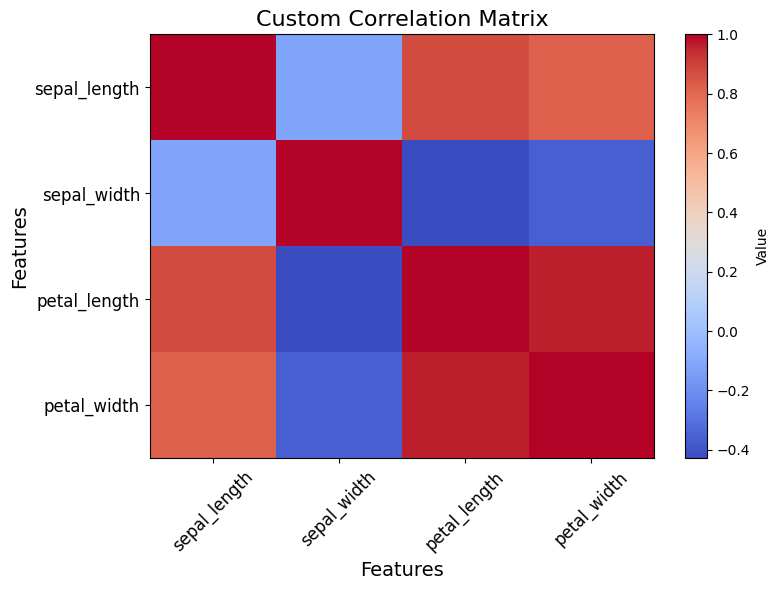

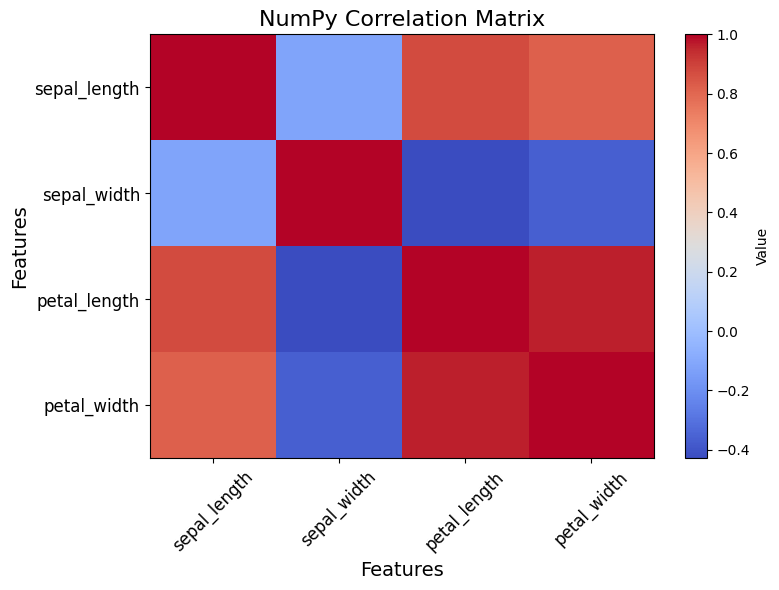

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_matrix(matrix, title, labels):
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, cmap="coolwarm", aspect="auto")
    plt.colorbar(label="Value")
    plt.title(title, fontsize=16)
    plt.xticks(ticks=np.arange(len(labels)), labels=labels, rotation=45, fontsize=12)
    plt.yticks(ticks=np.arange(len(labels)), labels=labels, fontsize=12)
    plt.xlabel("Features", fontsize=14)
    plt.ylabel("Features", fontsize=14)
    plt.tight_layout()
    plt.show()

feature_labels = iris_df.columns[:-1]

plot_matrix(custom_corr_matrix, "Custom Correlation Matrix", feature_labels)

plot_matrix(numpy_corr_matrix, "NumPy Correlation Matrix", feature_labels)




Part 3

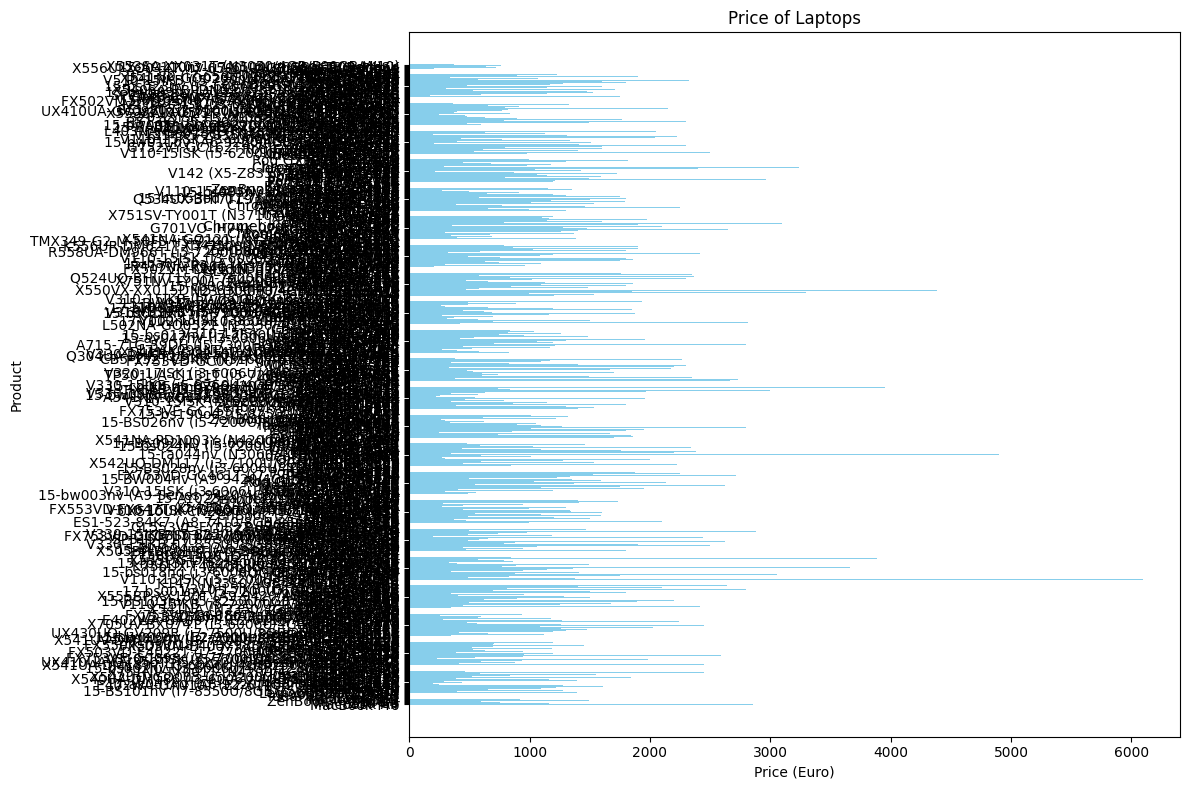

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('lp.csv')

plt.figure(figsize=(12, 8))
plt.barh(df['Product'], df['Price (Euro)'], color='skyblue')
plt.xlabel('Price (Euro)')
plt.ylabel('Product')
plt.title('Price of Laptops')
plt.tight_layout()
plt.show()


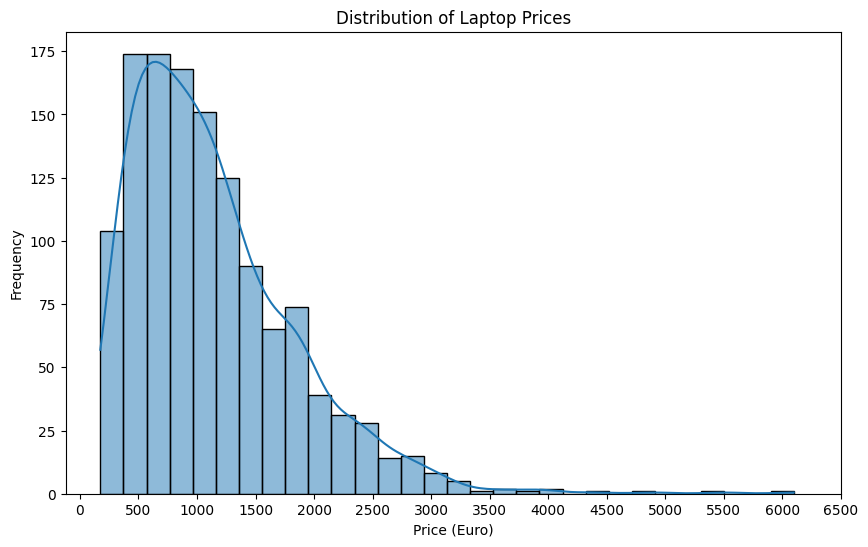

In [18]:


plt.figure(figsize=(10, 6))
sns.histplot(df["Price (Euro)"], bins=30, kde=True)
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price (Euro)")
plt.ylabel("Frequency")
plt.xticks(np.arange(0, 7000, 500))
plt.show()


In [19]:

average_prices = df.groupby('Company')['Price (Euro)'].mean()

most_expensive_company = average_prices.idxmax()
most_expensive_price = average_prices.max()

print("Average price for each company:")
print(average_prices)

print(f"\nThe company with the most expensive laptops on average is {most_expensive_company} with an average price of {most_expensive_price:.2f} Euro.")


Average price for each company:
Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price (Euro), dtype: float64

The company with the most expensive laptops on average is Razer with an average price of 3346.14 Euro.


In [22]:


df['OpSys'] = df['OpSys'].replace({
    'macOS': 'macOS',
    'Mac OS X': 'macOS',  # Normalize Mac OS variations
    'Windows 10': 'windows',  # Normalize Windows OS variations
    'Windows 10 S': 'windows',  # Normalize Windows OS variations
    'Windows 7': 'windows',  # Normalize older Windows versions
    'No OS': 'no_os',  # Normalize 'No OS'
    'Linux': 'linux',
    'Android': 'android',
    'Chrome OS': 'chrome_os'  # Normalize Chrome OS
})

unique_os = df['OpSys'].unique()

print("Different types of Operating Systems present in the data:")
print(unique_os)


Different types of Operating Systems present in the data:
['macOS' 'no_os' 'windows' 'linux' 'android' 'chrome_os']


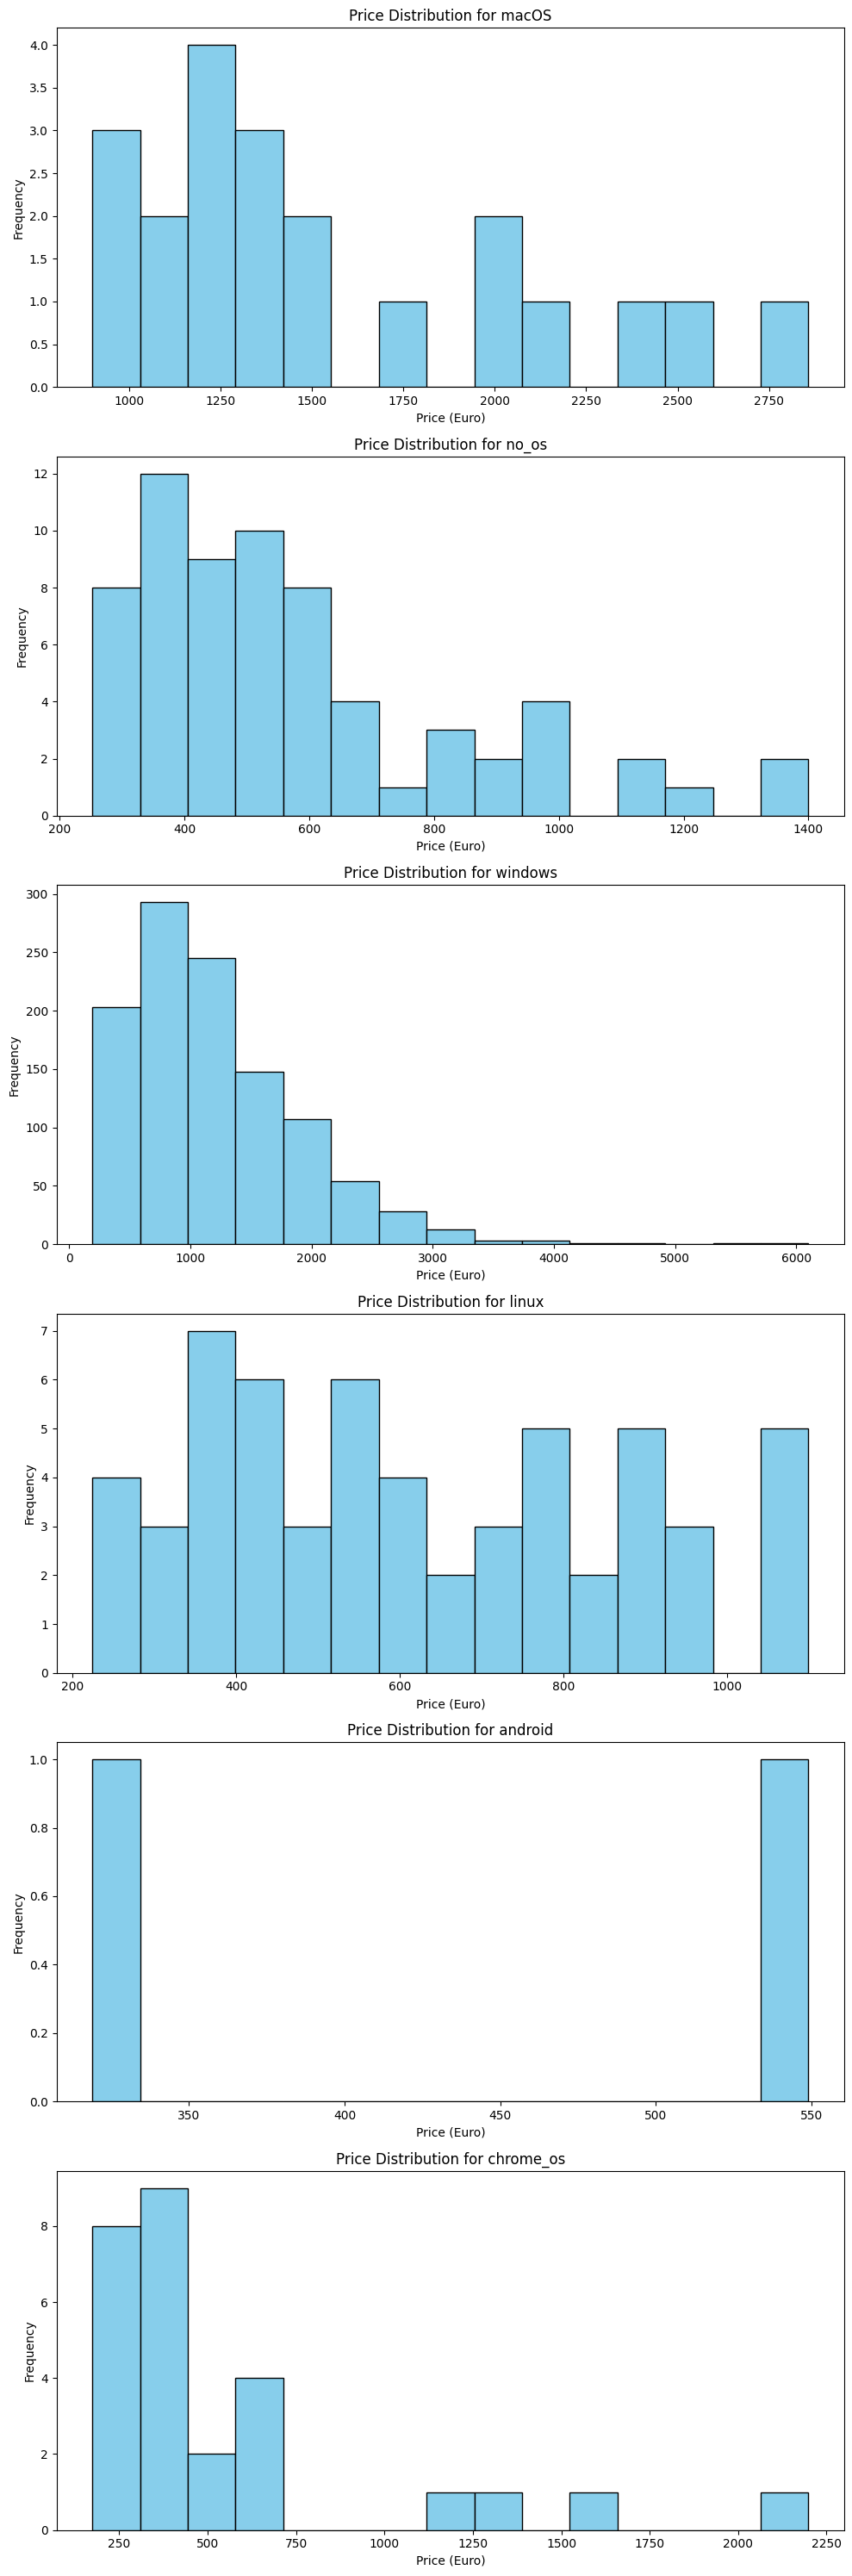

In [23]:


df['OpSys'] = df['OpSys'].replace({
    'macOS': 'macOS',
    'Mac OS X': 'macOS',  # Normalize Mac OS variations
    'Windows 10': 'windows',  # Normalize Windows OS variations
    'Windows 10 S': 'windows',  # Normalize Windows OS variations
    'Windows 7': 'windows',  # Normalize older Windows versions
    'No OS': 'no_os',  # Normalize 'No OS'
    'Linux': 'linux',
    'Android': 'android',
    'Chrome OS': 'chrome_os'  # Normalize Chrome OS
})

unique_os = df['OpSys'].unique()

fig, axes = plt.subplots(len(unique_os), 1, figsize=(10, len(unique_os)*5))

if len(unique_os) == 1:
    axes = [axes]

for i, os in enumerate(unique_os):
    os_data = df[df['OpSys'] == os]
    axes[i].hist(os_data['Price (Euro)'], bins=15, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Price Distribution for {os}')
    axes[i].set_xlabel('Price (Euro)')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


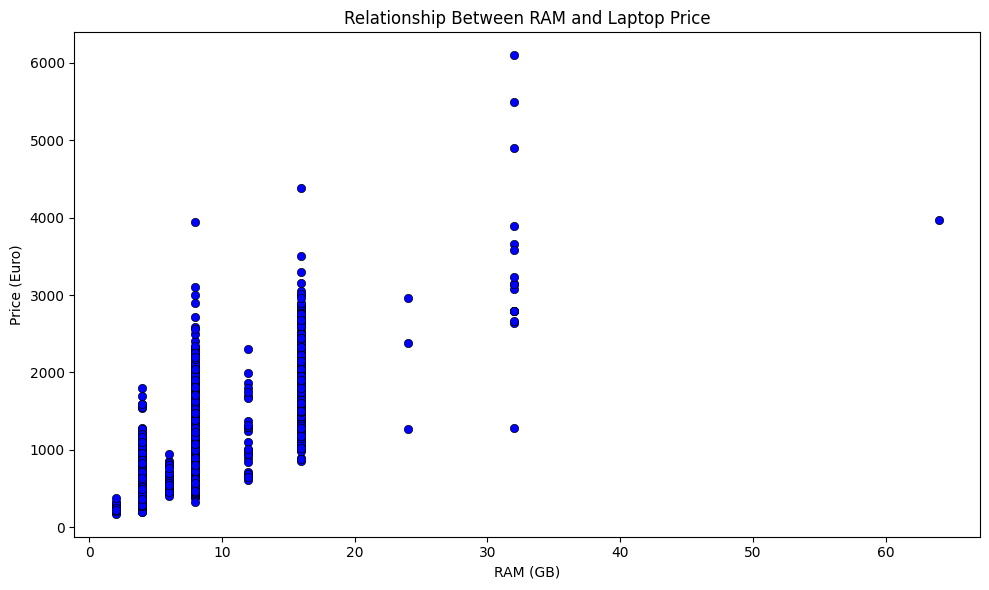

The correlation between RAM and laptop price is: 0.74


In [24]:

plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='RAM (GB)', y='Price (Euro)', color='blue', edgecolor='black')

plt.title('Relationship Between RAM and Laptop Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')

plt.tight_layout()
plt.show()

correlation = df['RAM (GB)'].corr(df['Price (Euro)'])
print(f"The correlation between RAM and laptop price is: {correlation:.2f}")


In [25]:
df['Storage type'] = df['Memory'].str.split(' ', expand=True)[1]

# Print the first few rows to check the new column
print(df[['Memory', 'Storage type']].head())

                Memory Storage type
0            128GB SSD          SSD
1  128GB Flash Storage        Flash
2            256GB SSD          SSD
3            512GB SSD          SSD
4            256GB SSD          SSD


Questions

1. How does the weight of laptops vary with the type of product?
2. Is there a correlation between screen size and price?
3. Which CPU type is most commonly associated with high-end laptops?
4. Do laptops with higher RAM tend to be lighter or heavier?
5. What is the distribution of laptop prices across different brands?


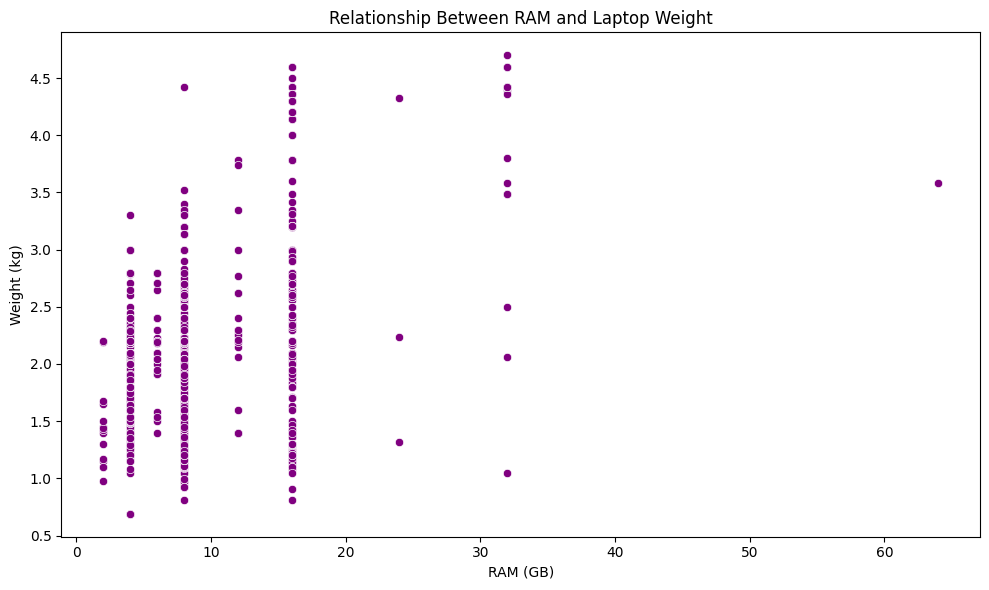

The correlation between RAM and laptop weight is: 0.39


In [27]:
#4 question
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RAM (GB)', y='Weight (kg)', color='purple')

plt.title('Relationship Between RAM and Laptop Weight')
plt.xlabel('RAM (GB)')
plt.ylabel('Weight (kg)')

plt.tight_layout()
plt.show()

correlation = df['RAM (GB)'].corr(df['Weight (kg)'])
print(f"The correlation between RAM and laptop weight is: {correlation:.2f}")

<ipython-input-28-21e36b018f12>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='TypeName', y='Weight (kg)', palette='Set2')


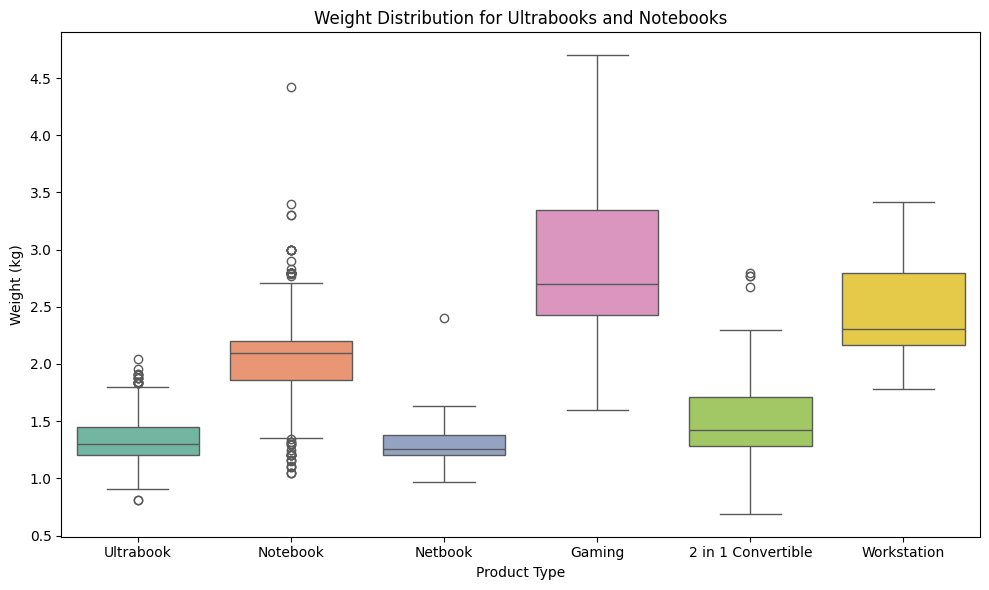

In [28]:
#1 question
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='TypeName', y='Weight (kg)', palette='Set2')

plt.title('Weight Distribution for Ultrabooks and Notebooks')
plt.xlabel('Product Type')
plt.ylabel('Weight (kg)')

plt.tight_layout()
plt.show()